# Lập trình thống kê với Python

# ANOVA cho phép đo lặp lại 

## BS. Lê Ngọc Khả Nhi

# Giới thiệu

Trong bài thực hành hôm nay, Nhi sẽ hướng dẫn các bạn code thủ công một phân tích ANOVA đơn biến cho thí nghiệm lặp lại (Repeated measure One-way ANOVA).

Dữ liệu minh họa trong bài này là một thí nghiệm sinh lý trên động vật vào năm 1994 của GS. J. Ludbrook. Trong thí nghiệm nguyên thủy, mục tiêu nhằm khảo sát hiệu ứng tương tác của hoạt chất phenylbiguanide (kích thích co mạch) và 1 chất đối vận serotonin (có tác dụng giảm co mạch) gây thay đổi huyết áp ở 5 con thỏ. Để đơn giản vấn đề, chúng tôi loại bỏ yếu tố can thiệp với đối vận serotonin, và chỉ giữ lại nhóm chứng và hiệu ứng của phenylbiguanide.

Câu hỏi nghiên cứu giả định trong bài toán hiện tại, do đó sẽ là: khảo sát hiệu ứng của liều thuốc phenylbiguanide lên huyết áp của thỏ.

Quy trình thí nghiệm là như sau: 5 con thỏ sẽ được tiêm tĩnh mạch lần lượt 6 liều phenylbiguanide từ D1 (thấp nhất) đến D6 (cao nhất) với khoảng cách 10 phút. Huyết áp thỏ được đo cùng lúc (như vậy mỗi con thỏ được đo huyết áp 6 lần).

Kết quả là BPchange, 1 biến định lượng liên tục. Mỗi con thỏ đều tham gia vào cả 6 lần đo tương ứng D1 đến D6. Khảo sát trực quan cho thấy khuynh hướng chung là BPchange tăng dần từ D1 đến D6 với dao động ngẫu nhiên tùy theo cá thể thỏ;


Đây là một thí nghiệm lặp lại, trong đó kết quả định lượng Yij sẽ được khảo sát nhiều lần tại nhiều thời điểm (Tj) khác nhau hoặc dưới những điều kiện/phương pháp (Fj) khác nhau tên cùng đối tượng (Si).

## Thí nghiệm lặp lại

Thiết kế này có rất nhiều ứng dụng trong nghiên cứu y học, thí dụ:

1) Đánh giá hiệu quả điều trị của phương pháp phẫu thuật: mỗi bệnh nhân được khảo sát 1 chỉ số lâm sàng Y trước và sau khi phẫu thuật (lưu ý: Repeated measure ANOVA là dạng tổng quát của paired samples Student t-test).

2) Khảo sát tính tương hợp của 3 máy đo đường huyết: Cùng một bệnh nhân sẽ được đo đường huyết bởi 3 máy đo, theo thứ tự ngẫu nhiên. Một thiết kế tương tự: khảo sát sự tương hợp chẩn đoán của 3 bác sĩ chẩn đoán hình ảnh khi cho họ đọc kết quả của cùng 1 phim CT-scan.

3) Nghiên cứu theo dõi kéo dài (longitudinal study): Một nhóm bệnh nhân được theo dõi diễn tiến của marker lâm sàng Y mỗi tháng một lần trong suốt quá trình điều trị bằng loại thuốc X, trong thời gian 1 năm.

Chú ý: Cần phân biệt giữa 2 thiết kế: Khảo sát lặp lại (repeated measure) và nghiên cứu dài hạn (longitudinal study):

Repeated measure không bắt buộc có biến số thời gian. Đa số trường hợp, việc lặp lại thí nghiệm đồng nghĩa với việc khảo sát tại nhiều thời điểm khác nhau và theo trình tự thời gian; thí dụ trong trường hợp này, 6 liều thuốc khác nhau sẽ được đưa vào cơ thể mỗi con thỏ theo thứ tự tăng dần, bắt đầu từ D1 và kết thúc ở D6; khi đó yếu tố Thời gian đã hòa nhập làm một với yếu tố Can thiệp và Điều kiện thí nghiệm, và bị ẩn đi.

Trong thí dụ thứ 2, thậm chí người ta còn muốn triệt tiêu vai trò của thời điểm/thời gian, bằng cách ngẫu nhiên hóa thứ tự của thí nghiệm; thí dụ cá thể A được đo bằng 3 phương pháp theo trình tự M1,M2,M3, nhưng cá thể B thì đổi sang trình tự khác: M2,M1,M3. Một số trường hợp khác, thậm chí không có yếu tố thời gian vì các thí nghiệm được thực hiện đồng thời, thí dụ thí nghiệm In-vitro trong đó một đoạn mạch máu được cắt ra thành 3 phần và mỗi phần cho tiếp xúc với 1 hoạt chất co mạch khác nhau.

Trong khi đó, Thời gian là một biến số quan trọng, tuyến tính và biểu kiến trong longitudinal study. Thời gian này có thể rất dài (đúng như tên gọi : longitudinal), qua nhiều năm, tháng; nhưng cũng có thể rất ngắn, thí dụ bạn khảo sát sự biến thiên của 1 đoạn tín hiệu Y với tần số lấy mẫu 10 Hz, kéo dài 30 giây. Thời gian nên được khảo sát như 1 biến liên tục trong longitudinal study.

## ANOVA cho phép đo lặp lại

Lý thuyết về ANOVA cho thí nghiệm lặp lại thường không được dạy trong chương trình thống kê. Do đó, khi thực hiện nghiên cứu lâm sàng, hầu hết các bác sĩ không biết đến phương pháp này. Thói quen thường gặp của họ là chia nhỏ bài toán ra thành nhiều cặp so sánh rồi dùng paired sample t-test hay Wilcoxon sign rank test để giải quyết. 

Trong giáo trình thống kê Y học, sinh viên thường thường được dạy tiếp cận vấn đề theo hướng so sánh trung bình giữa các phân nhóm. Cách nhìn này có thể đúng cho hầu hết trường hợp, như thí dụ này quả thực ta đang muốn so sánh BPchange trung bình giữa 6 phân nhóm (bậc) D1:D6; tuy nhiên Nhi khuyến khích cách đặt vấn đề: khảo sát hiệu ứng của yếu tố liều thuốc lên kết quả Y. 

Phương sai của kết quả Y có thể được giải thích qua một mô hình đơn giản như sau :

$$ Y_{ij} \sim \mu + S_{i} + F_{j} + \varepsilon _{ij} $$ 

Mô hình này ước lượng giá trị Y cho cá thể i tại điều kiện thí nghiệm j từ : trung bình của Y trong quần thể là Mu, hiệu ứng ngẫu nhiên Si (random effect, S = subject, phần biến thiên ngẫu nhiên ở từng cá thể) và hiệu ứng chính do yếu tố F (Fixed effect, hay within subject variance, F ở đây là điều kiện thí nghiệm).

Dạng chính tắc của ANOVA thường xem xét 2 hiệu ứng: between và within effect. Thí dụ thí nghiệm gốc trên thỏ này, between effect do hiệu ứng của đối vận serotonin, còn within effect do liều thuốc phenylbiguanide, Trong giới hạn của bài này, chúng ta chỉ bàn về Repeated measure trong một trường hợp đơn giản nhất và đặc biệt, đó là cả 3 hiệu ứng Thời gian, Can thiệp, điều kiện khảo sát đã hòa nhập làm một trong biến số Dose step, tức là chỉ còn duy nhất within effect.

Tuy nhiên nguyên tắc của ANOVA là không đổi. Ta vẫn định nghĩa được F từ Mean square (MS) của mô hình, so với MS của Residual

Tương tự như ANOVA đơn biến, ANOVA cho phép đo lặp lại đặt ra giả thuyết vô hiệu H0 là: không có sự khác biệt về giá trị trung bình giữa các điều kiện khảo sát (lượt đo). Giả thuyết đối nghịch H1 là: Có ít nhất 1 lần đo cho ra giá trị trung bình khác biệt so với những lần đo còn lại. Để kiểm tra giả thuyết này, ta tính trị số thống kê F = tỉ lệ giữa sự biến thiên gây ra bởi điều kiện khảo sát (ví dụ yếu tố thời gian, can thiệp, phương pháp đo) và biến thiên gây ra do yếu tố ngẫu nhiên nội tại.

Mọi phân tích ANOVA đều yêu cầu những giả định như sau :

+ Phân phối chuẩn :

Yj tại mỗi điều kiện thí nghiệm (phân nhóm) phải phân phối chuẩn chung quanh giá trị trung bình Muj.

Giả định này trên thực tế, hầu như không bao giờ được thỏa mãn, và những kiểm định thống kê để kiểm tra nó đều có nhược điểm nên cách xử trí tốt nhất là nhận xét trực quan và quyết định riêng của bạn (tính đồng dạng, outliers, …).

+ Tính độc lập của quan sát : điều này cho phép giả định về sự độc lập và ngẫu nhiên của sai số eij. Những cá thể trong từng phân nhóm phải độc lập với nhau. Thí nghiệm lặp lại là một trường hợp đặc biệt mà giả định này bị vi phạm một cách có hệ thống và chủ ý, vì mỗi cá thể tham gia vào tất cả bậc j của điều kiện thí nghiệm (phân nhóm), ta cũng đã hiệu chỉnh điều này bằng cách phân lập random effect Si và between subject effect Fj nên không phải bận tâm về giả định này.

+ Phương sai đồng nhất : Mỗi phân nhóm (điều kiện thí nghiệm, bậc của F) phải có phương sai như nhau. Với thí nghiệm Repeated measure, ta có giả định quan trọng hơn là « Sphericity », hay tính đồng nhất về phương sai của các giá trị khác biệt ở mỗi cá thể (trong 1 covariance matrix). Thí dụ, nếu ta có K điều kiện thí nghiệm (lần lặp lại), thì sẽ có k(k-1)/2 cặp khác biệt, giả định sphericity là chúng đều có phương sai như nhau.

Giả định Sphericity có thể kiểm tra bằng test Mauchly, hoặc quan sát covariance matrix. Tuy nhiên bước này có thể bỏ qua nếu ta hiệu chỉnh df của within subject factor (F) bằng hệ số epsilon theo phương pháp Greenhouse-Geisser (GG) hoặc Huynh-Feildt (HF). Epsilon = 1 khi không có vi phạm giả định.

Tuy nhiên, giả định sphericity là không cần thiết (không thể bị vi phạm), nếu K<3 (chỉ lặp lại thí nghiệm 2 lần). Sphericity cũng không cần thiết nếu trong mô hình không có tương tác giữa F và S (random intercept model, hay mỗi cá thể chỉ đo 1 lần tại mỗi điều kiện K) vì variance của khác biệt sẽ =0 như nhau cho mọi cá thể (Như vậy, trong thí dụ này hiện tại, việc hiệu chỉnh df và kiểm tra sphericity là không cần thiết).

# Thăm dò dữ liệu

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Công cụ
import pandas as pd
import numpy as np

# Đồ họa
import seaborn as sns
import matplotlib.pyplot as plt

# Thống kê
from scipy.stats import f as f_test, shapiro as sw, ttest_rel
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests

Trước hết, Nhi viết 1 hàm để tải dữ liệu về máy, và thực hiện thống kê mô tả, vẽ biểu đồ

In [2]:
def rabit_data_load():
    
    path = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/Rabbit.csv"
    
    df = pd.read_csv(path, 
                     sep=',', 
                     decimal='.', 
                     index_col=0)
    
    df = df.query("Treatment == 'Control'")
    
    df['Dose'] = df['Dose'].map({6.25: 'D1',
                                 12.50: 'D2',
                                 25: 'D3',
                                 50:'D4',
                                 100.00:'D5',
                                 200.00:'D6',
                                })
    
    return df[['Dose','Animal','BPchange']]

In [3]:
df = rabit_data_load()

df

,Dose,Animal,BPchange
1,D1,R1,0.50
2,D2,R1,4.50
3,D3,R1,10.00
4,D4,R1,26.00
5,D5,R1,37.00
6,D6,R1,32.00
7,D1,R2,1.00
8,D2,R2,1.25
9,D3,R2,4.00
10,D4,R2,12.00


Đây là dữ liệu dạng bảng dọc (long format), cột Dose chỉ điều kiện thí nghiệm (liều thuốc), cột Animal chỉ danh tính của đối tượng (con thỏ), cột BPchange là thay đổi huyết áp (biến kết quả).

Ta có thể làm thống kê mô tả để ước tính trung bình ở mỗi lần đo (liều thuốc D1-D6)

In [4]:
df.groupby('Dose').describe()['BPchange']

,count,mean,std,min,25%,50%,75%,max
Dose,,,,,,,,
D1,5.0,1.00,0.395285,0.50,0.75,1.0,1.25,1.5
D2,5.0,2.35,1.387444,1.25,1.50,1.5,3.00,4.5
D3,5.0,5.60,2.701851,3.00,4.00,5.0,6.00,10.0
D4,5.0,17.40,5.458938,12.00,14.00,16.0,19.00,26.0
D5,5.0,27.80,7.190271,20.00,22.00,27.0,33.00,37.0
D6,5.0,27.20,6.220932,18.00,24.00,29.0,32.00,33.0


Biểu đồ tuyến kí cho từng cá thể là dạng biểu đồ phổ biến cho thiết kế thí nghiệm lặp lại:

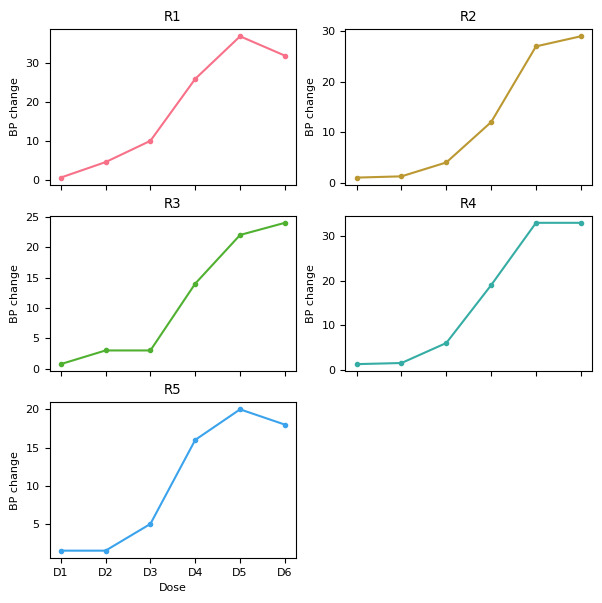

In [5]:
plt.rcParams.update({'font.size': 8})

pal = sns.color_palette("husl", 6).as_hex()

fig, axs = plt.subplots(nrows=3,ncols=2,
                            sharex=True, 
                            sharey=False,
                            dpi = 100,
                            figsize=(7,7))

for a,c,ax in zip(list(df.Animal.unique()),pal, axs.flatten()):
    
    temp_df = df[df['Animal'] == a]
    ax.set_title(f"{a}")
    x = temp_df.Dose
    y = temp_df.BPchange
    ax.plot(x,y,'.-',color = c)
    ax.set_ylabel('BP change')
    
    axs[2][0].set_xlabel('Dose')
    axs[2][1].set_visible(False)

Trong khi đó, biểu đồ boxplot cho phép kiểm tra giả định về phân phối chuẩn và khuynh hướng thay đổi của biến kết quả theo điều kiện khảo sát:

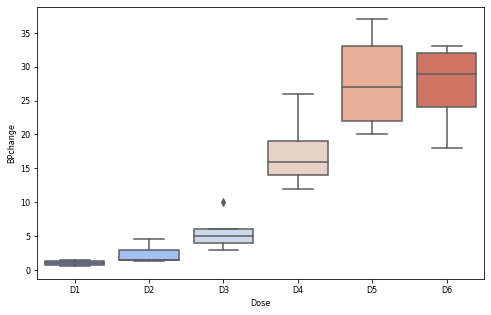

In [6]:
plt.rcParams["figure.figsize"] = (8,5)

sns.boxplot(x = df['Dose'], y = df['BPchange'], palette='coolwarm')

Nhận xét: Huyết áp tỉ lệ thuận với liều thuốc, tăng nhẹ từ D1 đến D3, tăng rõ rệt từ liều D3 lên D4,D5, sau đó ổn định từ D5-D6

# Tạo class RM_ANOVA

Tiếp theo, Nhi sử dụng Python OOP để thiết kế 1 class cho phép thực hiện ANOVA cho thí nghiệm lặp lại, tên là RM_ANOVA.

Khi khởi tạo 1 object, ta nhập vào 1 dataframe dạng bảng ngang (wide format) hay bảng dọc (long format)

Nếu là wide format, dataframe sẽ gồm k cột và n hàng, mỗi cột là 1 điều kiện thí nghiệm (lần đo), mỗi hàng là 1 cá thể. Ta có thể chọn một tập hợp điều kiện dưới dạng list cho argument 'cond', các argumen còn lại mặc định là None,

Nếu là long format, dataframe sẽ có 3 cột, tương tự như cấu trúc ở trên. Lúc này ta phải khai báo tên của cột chỉ danh tính đối tượng "subj", tên cột chỉ điều kiện : "cond", tên cột chỉ biến kết quả: "target".

Hàm init sẽ tự động chuyển đổi data frame bảng dọc thành bảng ngang (wide format), toàn bộ phân tích thống kê sẽ được thực hiện trên dataframe wide format.

Class RM_ANOVA có 2 method chính, là :

1) rm_anova cho phép thực hiện kiểm định Shapiro-Wilk, F_test, bao gồm hiệu chỉnh Sphericity theo 2 phương pháp Greenhouse-Geisser và Huynh-Feldt, và tính effect-size :

+ Hệ số Eta bình phương, còn gọi là partial eta-squared, hay Sample effect size (hệ số ảnh hưởng của mẫu khảo sát)

+ Hệ số Omega bình phương, hay còn gọi là Population effect size: Hệ số ảnh hưởng của quần thể

Hàm rm_anova có 2 arguments; p_normal = 0.05 là ngưỡng ý nghĩa của kiểm định Shapiro-Wilk, nếu p_normal = None, bỏ qua bước kiểm tra giả định phân phối chuẩn này.

argument 'alpha' = 0.05; là ngưỡng ý nghĩa của F test, cho phép phủ nhận H0 nếu p < alpha

2) post_hoc, cho phép thực hiện so sánh bắt cặp tuần tự giữa tất cả các điều kiện (lần đo). Người dùng có thể áp dụng thêm hiệu chỉnh giá trị p bằng nhiều phương pháp, thí dụ: 

'bonferroni' : one-step correction

'sidak' : one-step correction

'holm-sidak' : step-down method using Sidak adjustments

'holm' : step-down method using Bonferroni adjustments

'simes-hochberg' : step-up method  (independent)

'hommel' : closed method based on Simes tests (non-negative)

'fdr_bh' : Benjamini/Hochberg  (non-negative)

'fdr_by' : Benjamini/Yekutieli (negative)

'fdr_tsbh' : two stage fdr correction (non-negative)

'fdr_tsbky' : two stage fdr correction (non-negative)

In [8]:
class RM_ANOVA:
    
    def __init__(self, df, df_format = 'long', subj=None, cond=None, target=None):
        
        if df_format == 'wide':
            df = df[cond]
            
        if df_format == 'long':
            df = df.pivot(index = subj, 
                          columns = cond,
                          values = target)
    
        self.df = df.dropna(how = 'any', axis = 0)
        
    def __repr__(self):
        return f"Phân tích ANOVA phép đo lặp lại k={self.df.shape[1]}, {self.df.shape[0]} cá thể"
    
    def rm_anova(self,p_normal = 0.05, alpha = 0.05):
        
        df = self.df
    
        stat = pd.DataFrame(index=['Không hiệu chỉnh', 
                                   'Greenhouse-Geisser', 
                                   'Huynh-Feldt', 
                                   'Trung bình']) 
        
        def shapiro(x):
            W, p = sw(x)
            return pd.Series([W, p], 
                             index=['W', 'p'])
        
        def Greenhouse_Geisser(df):
        
            covar_mat = df.cov()
            m_cov = covar_mat.mean()
            m_total = m_cov.mean()
            DCCM = m_total + covar_mat.subtract(m_cov, axis=0) - m_cov
            epsilon = np.diag(DCCM).sum()**2/((DCCM.shape[0]-1)* np.sum(DCCM**2).sum())

            return epsilon
    
        def Huynh_Feldt(df):

            n, k = df.shape
            eps = Greenhouse_Geisser(df)
            epsilon = (n*(k-1)*eps - 2)/((k-1)*(n-1-(k-1)*eps))

            return epsilon

        n, k = df.shape  # number of subjects, number of conditions
        mk = df.mean()
        M = df.mean().mean()  # mean of all values
        mi = df.mean(axis=1)

        # Tính tổng bình phương sai số
        
        SSW = ((df - mk)**2).sum().sum()  # within groups variation
        SSC = n*((mk - M)**2).sum()  # condition variation
        SSI = k*((mi - M)**2).sum()  # within subjects variation
        SSE = SSW - SSI  # error variation

        # Hiệu chỉnh Sphericity
        stat['Epsilon'] = np.ones(4)
        stat['Epsilon'][1] = Greenhouse_Geisser(df)
        stat['Epsilon'][2] = Huynh_Feldt(df)
        stat['Epsilon'][3] = (stat['Epsilon'][1] + stat['Epsilon'][2])/2 

        # Độ tự do
        dof_k = k - 1  # Condition degrees of freedom
        dof_e = (n-1) * (k-1)  # Error degrees of freedom

        stat['df_cond'] = stat['Epsilon']*dof_k
        stat['df_error'] = stat['Epsilon']*dof_e
        
        SSM = SSC / dof_k
        MSE = SSE / dof_e

        # Kiểm định F
        stat['F'] = np.ones(4) * (SSM / MSE)

        stat['p'] = f_test.sf(stat['F'], 
                                      stat['df_cond'], 
                                      stat['df_error'])
        
        # Kích thước hiệu ứng
        F = stat['F'].values[0]
        eta = (SSC/(SSC + SSE))
        omega = ((k-1)*F)/((k-1)*(F-1)+(n*k))

        # Kiểm tra giả định pp chuẩn
        if p_normal is not None:
            normality = pd.DataFrame(df.apply(shapiro, axis=0)).transpose()
            normality['PP chuẩn'] = ['Đúng' if i else 'Sai' for i in normality['p'] > p_normal]
            
        stat[['df_cond','df_error']] = stat[['df_cond','df_error']].round(2)
        stat['Phủ định H0'] = ['Có thể' if pf else 'Không thể' for pf in stat.p < alpha] 

        # In kết quả
        print(stat[['Epsilon', 'df_cond', 'df_error', 'F', 'p','Phủ định H0']])
        print('\n')
        print('Kích thước hiệu ứng:')
        print(f"Eta-squared = {np.round(eta,3)}, \nOmega_squared = {np.round(omega,3)}")
        print('\n')
        print('Kiểm định Shapiro-Wilk')
        print(normality)
        
    def post_hoc(self,
                 alpha=0.05, 
                 p_adj = 'bonferroni',
                 one_sided = True,
                 matrix = 'H1'):
        
        df = self.df
        
        conds = df.columns 
        k = df.shape[1]
        pair_comb = list(combinations(conds, 2))

        pair_idx = pd.MultiIndex.from_tuples(pair_comb, names=['Nhóm 1', 'Nhóm 2']) 
        posthoc_df = pd.DataFrame(index=pair_idx, columns=['t', 'p'])

        for c1, c2 in pair_comb:
            posthoc_df.loc[c1,c2] = ttest_rel(df[c1], df[c2])
            posthoc_df.loc[c1,c2]['H0'] = f"{c1}={c2}"

        if p_adj:
            posthoc_df['p'] = multipletests(posthoc_df['p'], method=p_adj)[1]
            
            print(f'Hiệu chỉnh bằng phương pháp {p_adj}')

        posthoc_df['H1'] = "=" 
        if one_sided:
            posthoc_df.loc[(posthoc_df.p.values <= alpha) & (posthoc_df['t'].values > 0), 'H1'] = '>'
            posthoc_df.loc[(posthoc_df.p.values <= alpha) & (posthoc_df['t'].values < 0), 'H1'] = '<'
        else:
            posthoc_df.loc[(posthoc_df.p.values <= alpha), 'H1'] = '!='

        posthoc_df['Phủ định H0'] = ['Có thể' if pt else 'Không thể' for pt in posthoc_df.p < alpha]        

        vs = np.zeros((k,k))
        vs = pd.DataFrame(vs, columns = df.columns.values, index = df.columns.values)

        tri_lower = np.tril_indices(vs.shape[0], -1)

        for i, j in pair_comb:
            vs.loc[i,j] = posthoc_df.loc[i,j][matrix]

        vsm = vs.values
        vsm[tri_lower] = vsm.T[tri_lower]
        np.fill_diagonal(vsm, None)

        vs = pd.DataFrame(vsm, columns = df.columns.values, index = df.columns.values)

        return posthoc_df[['H1','t','p','Phủ định H0']],vs

# Sử dụng class RM_ANOVA

Trước tiên, Nhi thử với 1 dataframe long format, như ta đang có:

In [9]:
rm_aov = RM_ANOVA(df, df_format = 'long', subj='Animal', cond='Dose', target='BPchange')

In [10]:
rm_aov

Phân tích ANOVA phép đo lặp lại k=6, 5 cá thể

Ghi chú: đây chỉ là thí dụ minh họa, lẽ ra với n=5 thì Nhi nên dùng kiểm định phi tham số Friedman đúng không ?

thuộc tính df của object rm_aov đã được chuyển thành bảng ngang (wide format):

In [12]:
ldf = rm_aov.df

ldf

Dose,D1,D2,D3,D4,D5,D6
Animal,,,,,,
R1,0.50,4.50,10.0,26.0,37.0,32.0
R2,1.00,1.25,4.0,12.0,27.0,29.0
R3,0.75,3.00,3.0,14.0,22.0,24.0
R4,1.25,1.50,6.0,19.0,33.0,33.0
R5,1.50,1.50,5.0,16.0,20.0,18.0


Nhi thử lại lần nữa vói cú pháp dành cho bảng ngang, thí dụ ta chỉ muốn so sánh giữa D1, D3 và D5

In [13]:
rm_aov_wide = RM_ANOVA(ldf, df_format = 'wide', cond=['D1','D3','D5'])

rm_aov_wide

Phân tích ANOVA phép đo lặp lại k=3, 5 cá thể

In [14]:
rm_aov_wide.df

Dose,D1,D3,D5
Animal,,,
R1,0.50,10.0,37.0
R2,1.00,4.0,27.0
R3,0.75,3.0,22.0
R4,1.25,6.0,33.0
R5,1.50,5.0,20.0


Quay trở lại object rm_aov, ta sử dụng tiếp method rm_anova:

In [15]:
rm_aov.rm_anova()

                    Epsilon  df_cond  df_error        F             p  \
Không hiệu chỉnh    1.00000     5.00     20.00  60.1334  2.315056e-11   
Greenhouse-Geisser  0.35340     1.77      7.07  60.1334  4.361724e-05   
Huynh-Feldt         0.61218     3.06     12.24  60.1334  1.278938e-07   
Trung bình          0.48279     2.41      9.66  60.1334  2.331639e-06   

                   Phủ định H0  
Không hiệu chỉnh        Có thể  
Greenhouse-Geisser      Có thể  
Huynh-Feldt             Có thể  
Trung bình              Có thể  


Kích thước hiệu ứng:
Eta-squared = 0.938, 
Omega_squared = 0.923


Kiểm định Shapiro-Wilk
             W         p PP chuẩn
Dose                             
D1    0.986762  0.967174     Đúng
D2    0.826114  0.130044     Đúng
D3    0.903090  0.427200     Đúng
D4    0.926987  0.575975     Đúng
D5    0.941534  0.676806     Đúng
D6    0.914865  0.497374     Đúng


Mọi thứ đều ổn, Nhi có 1 bảng kết quả rất chi tiết, bao gồm 4 điều kiện: không hiệu chỉnh Sphericity, và có hiệu chỉnh bằng 2 phương pháp GG và HF, và trung bình của 2 method này.

Lưu ý là hiệu chỉnh chỉ làm thay đổi 2 độ tự do của F test, từ đó thay đổi p values, nhưng bản thân F và effect size là không đổi.

Hàm rm_aov cũng tính 2 effect-size là Eta bình phương và Omega bình phương. Giá trị cao hơn 0.5 được diễn giải là có hiệu ứng cao.

Tiếp theo, ta dùng method post_hoc để so sánh bắt cặp tuần tự:

Chú ý, trong method post_hoc có 4 arguments có thể điều chỉnh, và tùy vào giá trị của chúng kết quả có thể khác nhau:

+ alpha là ngưỡng ý nghĩa thống kê, 

+ p_adj là tên phương pháp hiệu chỉnh p values, mặc định là bonferroni

+ one-sided: kiểm định 1 hay 2 bên, mặc định là True; lúc này H1 sẽ là nhóm 1 cao hơn/ thấp hơn nhóm 2; nếu one-sided = False, H1 sẽ là: nhóm 1 khác với nhóm 2.

+ matrix : ma trận tóm tắt kết quả, có 2 hình thức: tóm tắt H1 (matrix = 'H1') và tóm tắt giá trị p (matrix = 'p').

Kết quả xuất ra gồm 1 dataframe chi tiết, và 1 matrix tóm tắt:

In [17]:
ph_df, mat = rm_aov.post_hoc(alpha=0.05, 
                             p_adj = 'bonferroni',
                             one_sided = True, 
                             matrix = 'H1')

ph_df

Hiệu chỉnh bằng phương pháp bonferroni


H1         t          p Phủ định H0
Nhóm 1 Nhóm 2                                    
D1     D2      =  -1.73742          1   Không thể
       D3      =  -3.56359   0.352654   Không thể
       D4      <  -6.49983  0.0433543      Có thể
       D5      <  -8.10032  0.0189386      Có thể
       D6      <  -9.12374  0.0120101      Có thể
D2     D3      =   -3.4744   0.382222   Không thể
       D4      <  -7.39667  0.0267268      Có thể
       D5      <  -8.57189   0.015259      Có thể
       D6      <  -9.25462  0.0113694      Có thể
D3     D4      <  -8.94556   0.012956      Có thể
       D5      <  -9.51817   0.010203      Có thể
       D6      <        -9  0.0126575      Có thể
D4     D5      =  -5.16143   0.100371   Không thể
       D6      =  -3.64214   0.328847   Không thể
D5     D6      =  0.452267          1   Không thể

In [18]:
mat

,D1,D2,D3,D4,D5,D6
D1,None,=,=,<,<,<
D2,=,None,=,<,<,<
D3,=,=,None,<,<,<
D4,<,<,<,None,=,=
D5,<,<,<,=,None,=
D6,<,<,<,=,=,None


In [19]:
ph_df,mat = rm_aov.post_hoc(alpha=0.05, 
                             p_adj = 'fdr_bh',
                             one_sided = False, 
                             matrix = 'H1')

ph_df

Hiệu chỉnh bằng phương pháp fdr_bh


H1         t           p Phủ định H0
Nhóm 1 Nhóm 2                                      
D1     D2       =  -1.73742    0.168548   Không thể
       D3      !=  -3.56359   0.0293878      Có thể
       D4      !=  -6.49983  0.00481715      Có thể
       D5      !=  -8.10032  0.00270552      Có thể
       D6      !=  -9.12374  0.00254316      Có thể
D2     D3      !=   -3.4744   0.0294017      Có thể
       D4      !=  -7.39667  0.00334085      Có thể
       D5      !=  -8.57189  0.00254316      Có thể
       D6      !=  -9.25462  0.00254316      Có thể
D3     D4      !=  -8.94556  0.00254316      Có thể
       D5      !=  -9.51817  0.00254316      Có thể
       D6      !=        -9  0.00254316      Có thể
D4     D5      !=  -5.16143   0.0100371      Có thể
       D6      !=  -3.64214   0.0293878      Có thể
D5     D6       =  0.452267    0.674518   Không thể

In [20]:
mat

,D1,D2,D3,D4,D5,D6
D1,None,=,!=,!=,!=,!=
D2,=,None,!=,!=,!=,!=
D3,!=,!=,None,!=,!=,!=
D4,!=,!=,!=,None,!=,!=
D5,!=,!=,!=,!=,None,=
D6,!=,!=,!=,!=,=,None


In [21]:
ph_df, mat_p = rm_aov.post_hoc(alpha=0.05, 
                               p_adj = 'fdr_bh',
                               one_sided = True, 
                               matrix = 'p') # 'fdr_bh' : Benjamini/Hochberg

ph_df

Hiệu chỉnh bằng phương pháp fdr_bh


H1         t           p Phủ định H0
Nhóm 1 Nhóm 2                                     
D1     D2      =  -1.73742    0.168548   Không thể
       D3      <  -3.56359   0.0293878      Có thể
       D4      <  -6.49983  0.00481715      Có thể
       D5      <  -8.10032  0.00270552      Có thể
       D6      <  -9.12374  0.00254316      Có thể
D2     D3      <   -3.4744   0.0294017      Có thể
       D4      <  -7.39667  0.00334085      Có thể
       D5      <  -8.57189  0.00254316      Có thể
       D6      <  -9.25462  0.00254316      Có thể
D3     D4      <  -8.94556  0.00254316      Có thể
       D5      <  -9.51817  0.00254316      Có thể
       D6      <        -9  0.00254316      Có thể
D4     D5      <  -5.16143   0.0100371      Có thể
       D6      <  -3.64214   0.0293878      Có thể
D5     D6      =  0.452267    0.674518   Không thể

In [22]:
mat_p

,D1,D2,D3,D4,D5,D6
D1,NaN,0.168548,0.029388,0.004817,0.002706,0.002543
D2,0.168548,NaN,0.029402,0.003341,0.002543,0.002543
D3,0.029388,0.029402,NaN,0.002543,0.002543,0.002543
D4,0.004817,0.003341,0.002543,NaN,0.010037,0.029388
D5,0.002706,0.002543,0.002543,0.010037,NaN,0.674518
D6,0.002543,0.002543,0.002543,0.029388,0.674518,NaN


# Diễn giải kết quả

Diễn đạt văn bản khoa học cho kết quả trên:

Phương pháp thống kê : Hiệu ứng của liều thuốc phenylbiguanide trên sự thay đổi của huyết áp thỏ được khảo sát bằng phân tích phương sai cho phép đo lặp lại với liều thuốc (k=6) là hiệu ứng chính, sai biệt cơ bản ở từng cá thể (i=5) là hiệu ứng ngẫu nhiên. 

Kết quả: Mô hình Bayes cho thấy liều thuốc gây ra hiệu ứng ý nghĩa làm tăng huyết áp (F(5,20)=58.78, p_value<0.0001 ; Eta squared = 0.938). Có sự khác biệt ý nghĩa giữa 2 liều thuốc khi tăng tuần tự từ D2 đến D5.

# Tổng kết

Tuy thí dụ minh họa trong bài chưa hoàn hảo đối với thí nghiệm ANOVA repeated measured vì không phân biệt rõ between, within effect và yếu tố thời gian; tuy nhiên các bạn đã có thể lập trình thủ công 1 quy trình ANOVA cho thí nghiệm lặp lại, một cách hoàn chỉnh.